Mainly used for Classification model.
But can be even used for Regression model
Effective in high Dimensined space.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()


In [5]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df['target'] = data.target

In [11]:
df['cancer class'] = df.target.apply(lambda x:data.target_names)

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cancer class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,"[malignant, benign]"
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,"[malignant, benign]"
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,"[malignant, benign]"
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,"[malignant, benign]"
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,"[malignant, benign]"


In [14]:
df[50:60]   #slicing

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cancer class
50,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,0.4062,1.2100,2.635,28.470,0.005857,0.009758,0.011680,0.007445,0.02406,0.001769,12.980,25.72,82.98,516.5,0.1085,0.08615,0.055230,0.03715,0.2433,0.06563,1,"[malignant, benign]"
51,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,0.1872,0.9234,1.449,14.550,0.004477,0.011770,0.010790,0.007956,0.01325,0.002551,14.670,23.19,96.08,656.7,0.1089,0.15820,0.105000,0.08586,0.2346,0.08025,1,"[malignant, benign]"
52,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,0.1868,0.06110,0.2273,0.6329,1.520,17.470,0.007210,0.008380,0.013110,0.008000,0.01996,0.002635,13.100,21.33,83.67,527.2,0.1144,0.08906,0.092030,0.06296,0.2785,0.07408,1,"[malignant, benign]"
53,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.177200,0.106000,0.2092,0.06310,0.8337,1.5930,4.877,98.810,0.003899,0.029610,0.028170,0.009222,0.02674,0.005126,20.600,24.13,135.10,1321.0,0.1280,0.22970,0.262300,0.13250,0.3021,0.07987,0,"[malignant, benign]"
54,15.100,22.02,97.26,712.8,0.09056,0.07081,0.052530,0.033340,0.1616,0.05684,0.3105,0.8339,2.097,29.910,0.004675,0.010300,0.016030,0.009222,0.01095,0.001629,18.100,31.69,117.70,1030.0,0.1389,0.20570,0.271200,0.15300,0.2675,0.07873,0,"[malignant, benign]"
55,11.520,18.75,73.34,409.0,0.09524,0.05473,0.030360,0.022780,0.1920,0.05907,0.3249,0.9591,2.183,23.470,0.008328,0.008722,0.013490,0.008670,0.03218,0.002386,12.840,22.47,81.81,506.2,0.1249,0.08720,0.090760,0.06316,0.3306,0.07036,1,"[malignant, benign]"
56,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,0.1917,0.05961,0.7275,1.1930,4.837,102.500,0.006458,0.023060,0.029450,0.015380,0.01852,0.002608,26.140,28.14,170.10,2145.0,0.1624,0.35110,0.387900,0.20910,0.3537,0.08294,0,"[malignant, benign]"
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.129300,0.081230,0.2027,0.06758,0.4226,1.1500,2.735,40.090,0.003659,0.028550,0.025720,0.012720,0.01817,0.004108,17.870,30.70,115.70,985.5,0.1368,0.42900,0.358700,0.18340,0.3698,0.10940,0,"[malignant, benign]"
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.960,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.230,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,1,"[malignant, benign]"
59,8.618,11.79,54.34,224.5,0.09752,0.05272,0.020610,0.007799,0.1683,0.07187,0.1559,0.5796,1.046,8.322,0.010110,0.010550,0.019810,0.005742,0.02090,0.002788,9.507,15.40,59.90,274.9,0.1733,0.12390,0.116800,0.04419,0.3220,0.09026,1,"[malignant, benign]"


In [15]:
df.shape

(569, 32)

In [22]:
df0 = df[df.target==0].head(50)
df1 = df[df.target==1].head(50)

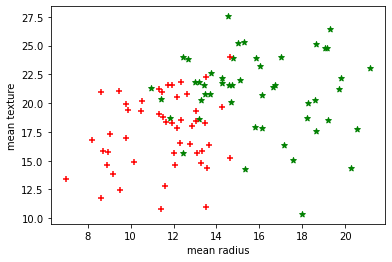

In [23]:
import matplotlib.pyplot as plt
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(df0['mean radius'],df0['mean texture'],color='green',marker='*')
plt.scatter(df1['mean radius'],df1['mean texture'],color='red',marker='+')


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = df.drop(['target','cancer class'],axis=1)
y = df.target

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5,stratify=y)

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC()

In [31]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
model.score(x_test,y_test)

0.8811188811188811

In [34]:
from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(y_test,model.predict(x_test)))
cm

array([[38, 15],
       [ 2, 88]])